(800, 1200, 3)


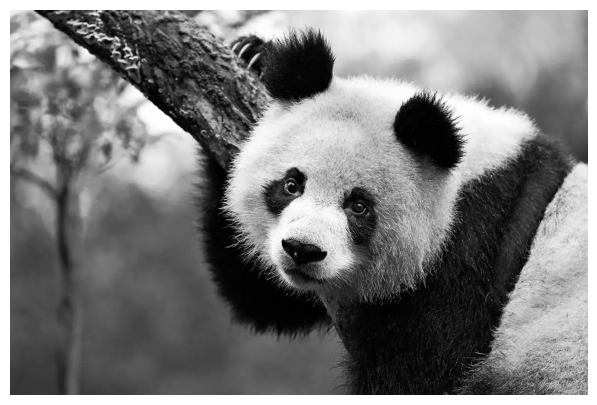

In [34]:
import  matplotlib.pyplot as plt 
from matplotlib.image import imread 
import  numpy as np 
import os 
plt.rcParams['figure.figsize'] = [10,5]

A = imread('panda.jpg') 
# A = np.random.randn(900,900,3)
# A = 0*np.random.randn(900,900,3) +1
print(A.shape)
X = np.mean(A, -1) # Convert RGB to grayscale 

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis("off")
plt.show()

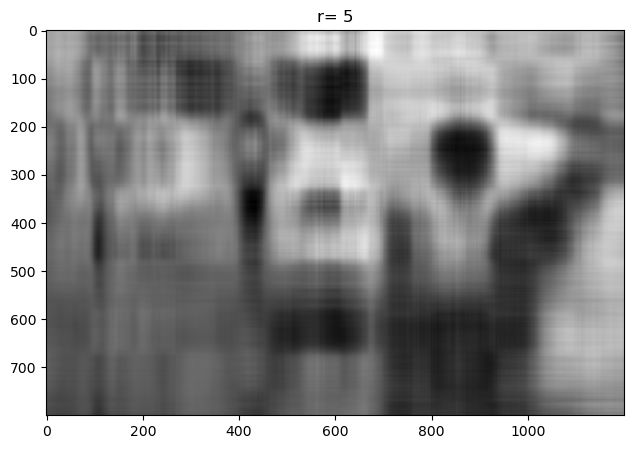

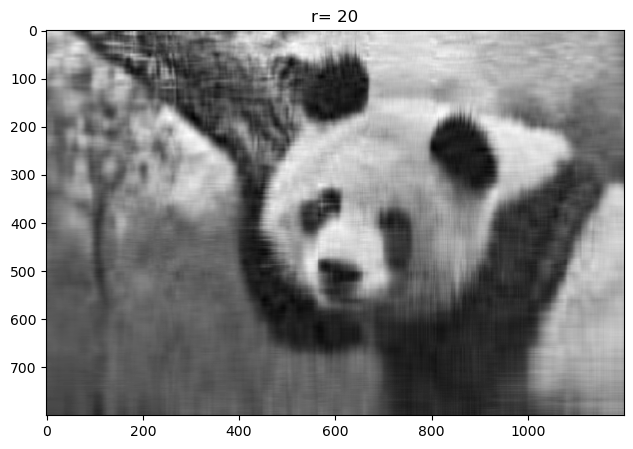

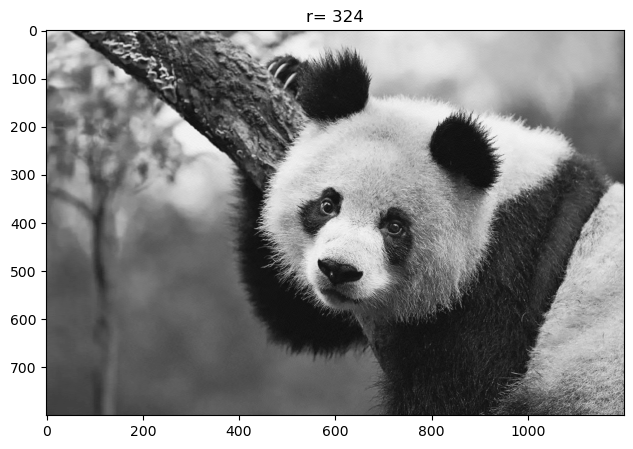

In [35]:
U, S, VT =  np.linalg.svd(X, full_matrices=False)
S =np.diag(S)

j=0
for r in (5,20,324):
    X_approx = U[:,:r] @ S[0:r, :r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(X_approx)
    img.set_cmap('gray')
    plt.title('r= '+ str(r))
    plt.show


In [36]:
print("X-shape", X.shape,"S -shape", S.shape)

X-shape (800, 1200) S -shape (800, 800)


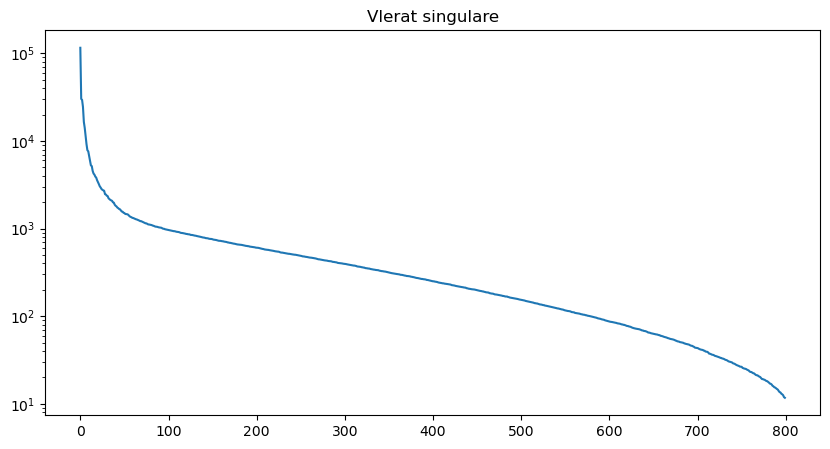

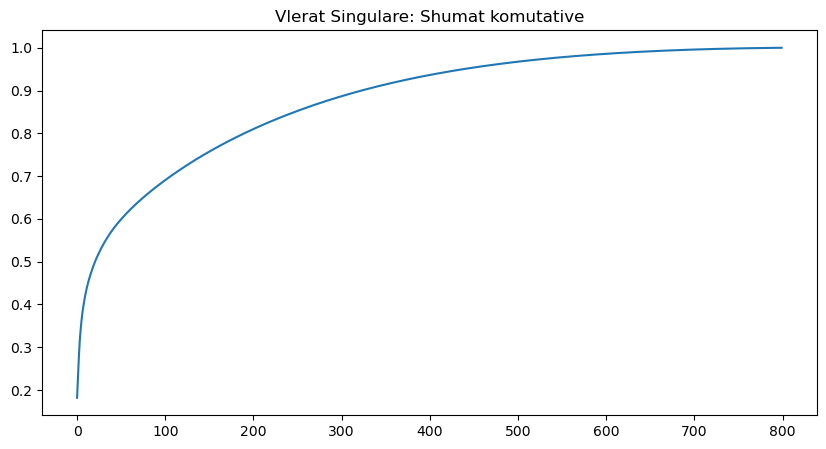

In [37]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Vlerat singulare")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))
plt.title('Vlerat Singulare: Shumat komutative')
plt.show()


In [38]:
S[0][0]

116194.22903828566

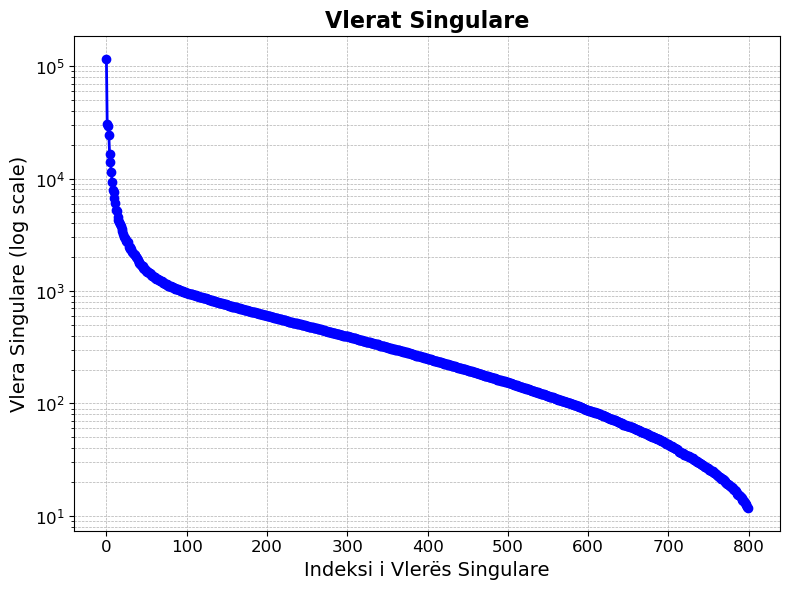

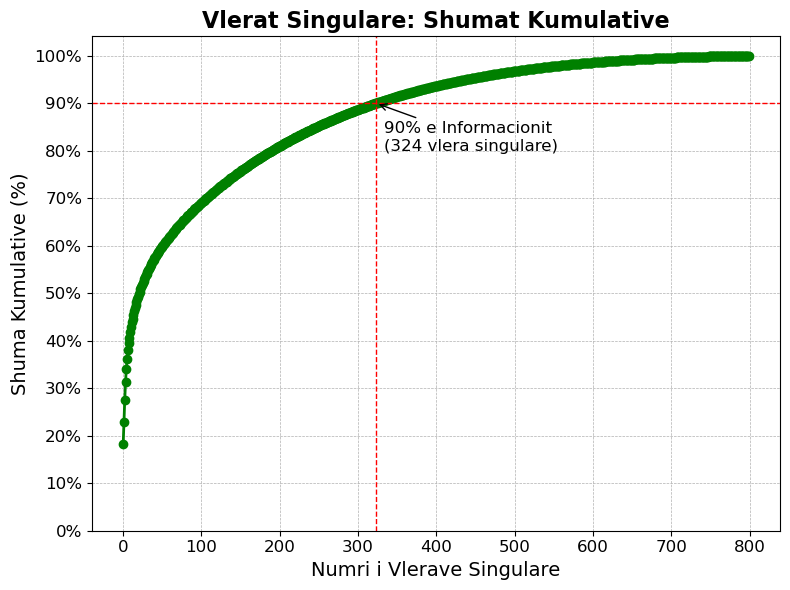

In [39]:
# Assuming S is the matrix of singular values from SVD

# First plot: Singular values on a logarithmic scale
plt.figure(1, figsize=(8, 6))
plt.semilogy(np.diag(S), marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title("Vlerat Singulare", fontsize=16, fontweight='bold')
plt.xlabel("Indeksi i Vlerës Singulare", fontsize=14)
plt.ylabel("Vlera Singulare (log scale)", fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Second plot: Cumulative sum of singular values
plt.figure(2, figsize=(8, 6))
cumsum = np.cumsum(np.diag(S) / np.sum(np.diag(S)))
plt.plot(cumsum, marker='o', color='g', linestyle='-', linewidth=2, markersize=6)
plt.title("Vlerat Singulare: Shumat Kumulative", fontsize=16, fontweight='bold')
plt.xlabel("Numri i Vlerave Singulare", fontsize=14)
plt.ylabel("Shuma Kumulative (%)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(x * 100)}%" for x in np.arange(0, 1.1, 0.1)], fontsize=12)

# Adding an annotation for the point where we retain 90% of the information
threshold = 0.9
index_90 = np.argmax(cumsum >= threshold)
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=1)
plt.axvline(x=index_90, color='r', linestyle='--', linewidth=1)
plt.annotate(f'90% e Informacionit\n({index_90+1} vlera singulare)', 
             xy=(index_90, threshold), xytext=(index_90 + 10, threshold - 0.1),
             arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=12)

plt.tight_layout()
plt.show()